# CM2000 Lab 2.A. Object Tracking

This code was adapted from OpenCV tutorials.

<a target="_blank" href="https://learnopencv.com">View on learnopencv.com</a>

## Imports

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tools import *

## Task 1: Object detection for a video file

### 1.1. Code asssignment

Run object detection tracking for a .mp4 file. Use snatch.mp4 as an example and track the barbell path by defining the correct region of interest (ROI).

The code below executes object tracking for a video file in .mp4 format defined by video_path variable. Pick the .mp4 file and run the code. A window will pop up with the first frame of the video. You should select the region of interest by drawing a rectangle from the top left to the bottom right corner. You can re-draw it multiple times. When happy with the result, press Enter and the tracking will start. When finished, press any key on your keyboard to close the window and release the resources to be able to run the code again, or continue running the next blocks (you need to have the video window selected on that step).

In [3]:
# Define the video file path
video_path = './object_tracking/snatch.mp4'

# Define the video capture object
video_capture = cv2.VideoCapture(video_path)
window_name = "task 1"
cv2.namedWindow(window_name)

# Get frame count
frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

# Read the first frame from the video
ret, frame = video_capture.read()

# Select a region of interest (ROI) to track
bbox = cv2.selectROI(window_name, frame, False)

# Initialize the tracker
roi = frame[bbox[1]:bbox[1] + bbox[3], bbox[0]:bbox[0] + bbox[2]]
roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(roi_hsv, np.array((0., 60.,32.)), np.array((180.,255.,255.)))

roi_hist = cv2.calcHist([roi_hsv], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Set termination criteria for the tracker
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while video_capture.isOpened():
    # Read a new frame from the video
    ret, frame = video_capture.read()

    if not ret:
        break

    # Convert the frame to HSV color space
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Calculate the back projection of the frame
    frame_backproj = cv2.calcBackProject([frame_hsv], [0], roi_hist, [0, 180], 1)

    # Apply CAMShift to get the new bounding box
    ret, bbox = cv2.CamShift(frame_backproj, bbox, term_crit)

    # Draw the new bounding box on the frame
    pts = cv2.boxPoints(ret)
    pts = np.intp(pts)
    cv2.polylines(frame, [pts], True, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow(window_name, frame)

    # Exit if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close windows
cv2.waitKey(0)
cv2.destroyWindow(window_name)
cv2.waitKey(1)
video_capture.release()

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


2023-10-12 17:11:28.247 Python[22164:2362473] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


Change the definition of the mask and see what happens. Write a paragraph about your observations. Propose a way of making the definition of the mask more generalizable (you don't need to implement it, just describe what you would do)

mask = cv2.inRange(roi_hsv, np.array((0., 60.,32.)), np.array((180.,255.,255.))) It accurately identifies the color of the object and tracks its movement by selecting the exact paint color corresponding to the object. If I change the parameters, it will recognize a different color, allowing me, for example, to track the movement of red pants by adjusting the color gamut to exactly match the shade of red. 

In [4]:

# Calculate the centroid of the bounding box
centroid_x = int((bbox[0] + bbox[2]) / 2)
centroid_y = int((bbox[1] + bbox[3]) / 2)
## Task 2: Draw centroid
# Draw the centroid on the frame
cv2.circle(frame, (centroid_x, centroid_y), 5, (255, 0, 0), -1)  # Draws a blue-filled circle
# ...

# Apply CAMShift to get the new bounding box
ret, bbox = cv2.CamShift(frame_backproj, bbox, term_crit)

# Calculate the centroid of the bounding box
centroid_x = int((bbox[0] + bbox[2]) / 2)
centroid_y = int((bbox[1] + bbox[3]) / 2)

# Draw the new bounding box on the frame
pts = cv2.boxPoints(ret)
pts = np.intp(pts)
cv2.polylines(frame, [pts], True, (0, 255, 0), 2)

# Draw the centroid on the frame
cv2.circle(frame, (centroid_x, centroid_y), 5, (255, 0, 0), -1)  # Draws a blue-filled circle

# ...

### 2.1. Code asssignment

Draw a circle of radius 2 and colour red marking the centroid of the region of interest in every frame. Implement the code to retrieve the coordinates of the centroid of the ROI. Then save a .gif with the drawing of the ROI and centroid. 

Do not edit the code on the block above. instead, copy the code, paste below and make the changes in order to complete the task. Save the .gif file as './object_tracking/snatch_centroid.gif'. Make sure you maintain the original colors of the video when you save the .gif file.  
Tip: check tools.py

In [5]:
# Define the video file path
video_path = './object_tracking/snatch.mp4'

# Define the video capture object
video_capture = cv2.VideoCapture(video_path)
window_name = "task 1"
cv2.namedWindow(window_name)

# Get frame count
frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

# Read the first frame from the video
ret, frame = video_capture.read()

# Select a region of interest (ROI) to track
bbox = cv2.selectROI(window_name, frame, False)

# Initialize the tracker
roi = frame[bbox[1]:bbox[1] + bbox[3], bbox[0]:bbox[0] + bbox[2]]
roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(roi_hsv, np.array((0., 60.,32.)), np.array((180.,255.,255.)))

roi_hist = cv2.calcHist([roi_hsv], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Set termination criteria for the tracker
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

frames =[]
listX = []
listY = []

while video_capture.isOpened():
    # Read a new frame from the video
    ret, frame = video_capture.read()

    if not ret:
        break

    # Convert the frame to HSV color space
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Calculate the back projection of the frame
    frame_backproj = cv2.calcBackProject([frame_hsv], [0], roi_hist, [0, 180], 1)

    # Apply CAMShift to get the new bounding box
    ret, bbox = cv2.CamShift(frame_backproj, bbox, term_crit)

    # Draw the new bounding box on the frame
    pts = cv2.boxPoints(ret)
    pts = np.intp(pts)
    cv2.polylines(frame, [pts], True, (0, 255, 0), 2)


    # Calculate the centroid of the bounding box
    centroid_x = int(bbox[0] + bbox[2]/ 2)
    centroid_y = int(bbox[1] + bbox[3] / 2)
    cv2.circle(frame,(centroid_x,centroid_y) , 2, (0,0,255), 2)

  
    
    #Add centroid point to the list
    listX.append(centroid_x)
    listY.append(centroid_y)

#Convert the BGR in RGB
    frameRGB=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    
    frames.append(frameRGB)

    # Display the resulting frame
    cv2.imshow(window_name, frame)

    # Exit if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
    

# Release the video capture object and close windows
cv2.waitKey(0)
cv2.destroyWindow(window_name)
cv2.waitKey(1)
video_capture.release()# Define the video file path
video_path = './object_tracking/snatch.mp4'


 

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


In [6]:
from tools import to_gif

to_gif(frames,int(1000/frame_count), './object_tracking/snatch_centroid.gif')

./object_tracking/snatch_centroid.gif saved!


## Task 3: Centroid path

### 3.1. Code asssignment

Plot x and y components of the centroid path.

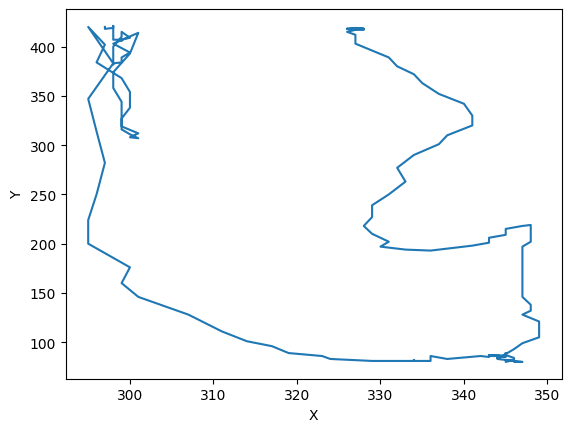

In [7]:
plt.plot(listX ,listY)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### 3.2. Written assignment

Write a short paragraph analysing and discussing the result of the centroid tracking. Then, write a paragraph discussing possible use cases of this algorithm in this or other sports.

The centroid tracker I've developed effectively traces the path of centroids by drawing a line on the video along their trajectory. It is versatile and applicable in various sports with expansive motion ranges. For instance, in tennis, we can use it to monitor the movement of a tennis racket, identifying areas where technique can be enhanced. Similarly, in basketball, we can track the trajectory of a ball in a player's shooting hand to pinpoint areas for improvement in technique.

## Task 4: Draw contours


### 4.1. Code assignment


Implement the code to find and draw contours within the region of interest. Tip: Look up cv2.findContour and try different thresholds. You can also tweak around with padding the region of the ROI where you want to find the contours.
Save a .gif with the drawing of the ROI and contours, without the centroid.

Copy the code from above, paste below and make the changes in order to complete the task. Save the .gif file as './object_tracking/snatch_contours.gif'. Maintain the original colors of the video.

In [ ]:
# Define the video file path
video_path = './object_tracking/snatch.mp4'

# Define the video capture object
video_capture = cv2.VideoCapture(video_path)
window_name = "task 1"
cv2.namedWindow(window_name)

# Get frame count and frame rate
frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
frame_rate = int(video_capture.get(cv2.CAP_PROP_FPS))

# Read the first frame from the video
ret, frame = video_capture.read()

# Select a region of interest (ROI) to track
bbox = cv2.selectROI(window_name, frame, False)

# Initialize the tracker
roi = frame[int(bbox[1]):int(bbox[1] + bbox[3]), int(bbox[0]):int(bbox[0] + bbox[2])]
roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(roi_hsv, np.array((0., 60., 0.)), np.array((255., 255., 255.)))
roi_hist = cv2.calcHist([roi_hsv], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Set termination criteria for the tracker
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

# Create a list to store frames
frames = []

while True:
    # Read a new frame from the video
    ret, frame = video_capture.read()

    if not ret:
        break

    # Convert the frame to HSV color space
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Calculate the back projection of the frame
    frame_backproj = cv2.calcBackProject([frame_hsv], [0], roi_hist, [0, 180], 1)

    # Apply CAMShift to get the new bounding box
    ret, bbox = cv2.CamShift(frame_backproj, bbox, term_crit)


    # Draw the new bounding box on the frame
    pts = cv2.boxPoints(ret)
    pts = np.int0(pts)
    cv2.polylines(frame, [pts], True, (0, 255, 0), 2)


    # Find contours within the ROI
    roi_frame = frame[int(bbox[1]):int(bbox[1] + bbox[3]), int(bbox[0]):int(bbox[0] + bbox[2])]
    gray_roi = cv2.cvtColor(roi_frame, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray_roi, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the ROI
    cv2.drawContours(roi_frame, contours, -1, (0, 0, 255), 2)

    # Display the resulting frame
    cv2.imshow(window_name, frame)

    # Append the frame to the frames list

    frame_colour = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
    frames.append(frame_colour)
    
    # Exit if the 'q' key is pressed
    key = cv2.waitKey(1)
    if key & 0xFF == ord('q'):
        break

# Release the video capture object and close windows
cv2.destroyAllWindows()
video_capture.release()

In [ ]:
# After processing, save the frames as a GIF without color remapping
from tools import to_gif
to_gif(frames, int(10000 / frame_count), './object_tracking/snatch_contours.gif')

### 4.2 Written assignment

Analyse and compare the results that you get from centroid and contour tracking. Which one was more robust? Which one would you use to track the barbell? Write a short paragraph.

In my view, centroid tracking tends to be more robust because, in contour tracking, the original contour may not align closely with the barbell. Nevertheless, a more advanced contour tracker might perform a superior job in tracking the barbell compared to the implementation in my code.

## Bonus Task 1



(For you who like sports and programming)

Use kalmanFilter.py (or implement your own Kalman filter) in the centroid tracking. Change the initialization parameters. Explain why you chose certain parameters and how they change the results. Draw on the video both the original centroid (red circle) and the kalman filtered prediction (green circle). You don't need to draw the barbell path. Save a .gif file to ./object_tracking/snatch_kalman.gif' with the result. Plot a chart with the x and y the coordinates of the centroid with and without the filter, analyse and discuss your results.

In [9]:
from kalmanFilter import KalmanFilter

## Bonus Task 2


(For you who like sports and biomechanics)


Draw the barbell path of the centroid on the video. Save a .gif file to './object_tracking/snatch_path.gif' showing the barbell paths. Then, compute the vertical and horizontal velocities of the barbell in m/s. Plot the x and y velocities. Find and plot the frame where the velocity was maximum when the athlete is pulling the barbell up. If you did the previous bonus task, compare the velocity computed with and without the Kalman filter.

Tip: Google the standard size of a weightlifting plate to convert pixels to meters. Extra tip: [pixels/frames] * [m/pixels] * [frames/s] = [m/s]

In [10]:
from scipy.signal import find_peaks

## Bonus task 3



(For you who like sports)

Record YOUR OWN sports-related video and perform object tracking. Analyse the results and discuss how they would be used in real life.